In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import itertools

In [9]:
file_path='C://Users//cheth//OneDrive//Desktop//Alabs Docs//Machine learning//case_study//13. Capstone Case Study - Demand Estimation (1)'
df = pd.read_csv(file_path+'//Electricity Consumption.csv')

In [17]:
df.DATE=pd.to_datetime(df['DATE'],format='%d/%m/%Y')
df

DATE  Electricty_Consumption_in_TW
0   1973-01-01                       35.9728
1   1973-01-02                       36.1334
2   1973-01-03                       35.0625
3   1973-01-04                       33.8416
4   1973-01-05                       33.5107
..         ...                           ...
556 2019-01-05                       97.5860
557 2019-01-06                      110.8580
558 2019-01-07                      122.1014
559 2019-01-08                      121.7765
560 2019-01-09                      109.7190

[561 rows x 2 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [11]:
df.describe()

Electricty_Consumption_in_TW
count                    561.000000
mean                      76.681764
std                       22.756474
min                       33.510700
25%                       55.919700
50%                       78.417000
75%                       93.840600
max                      123.216300

In [12]:
#  we are haviing the 46 years of data 

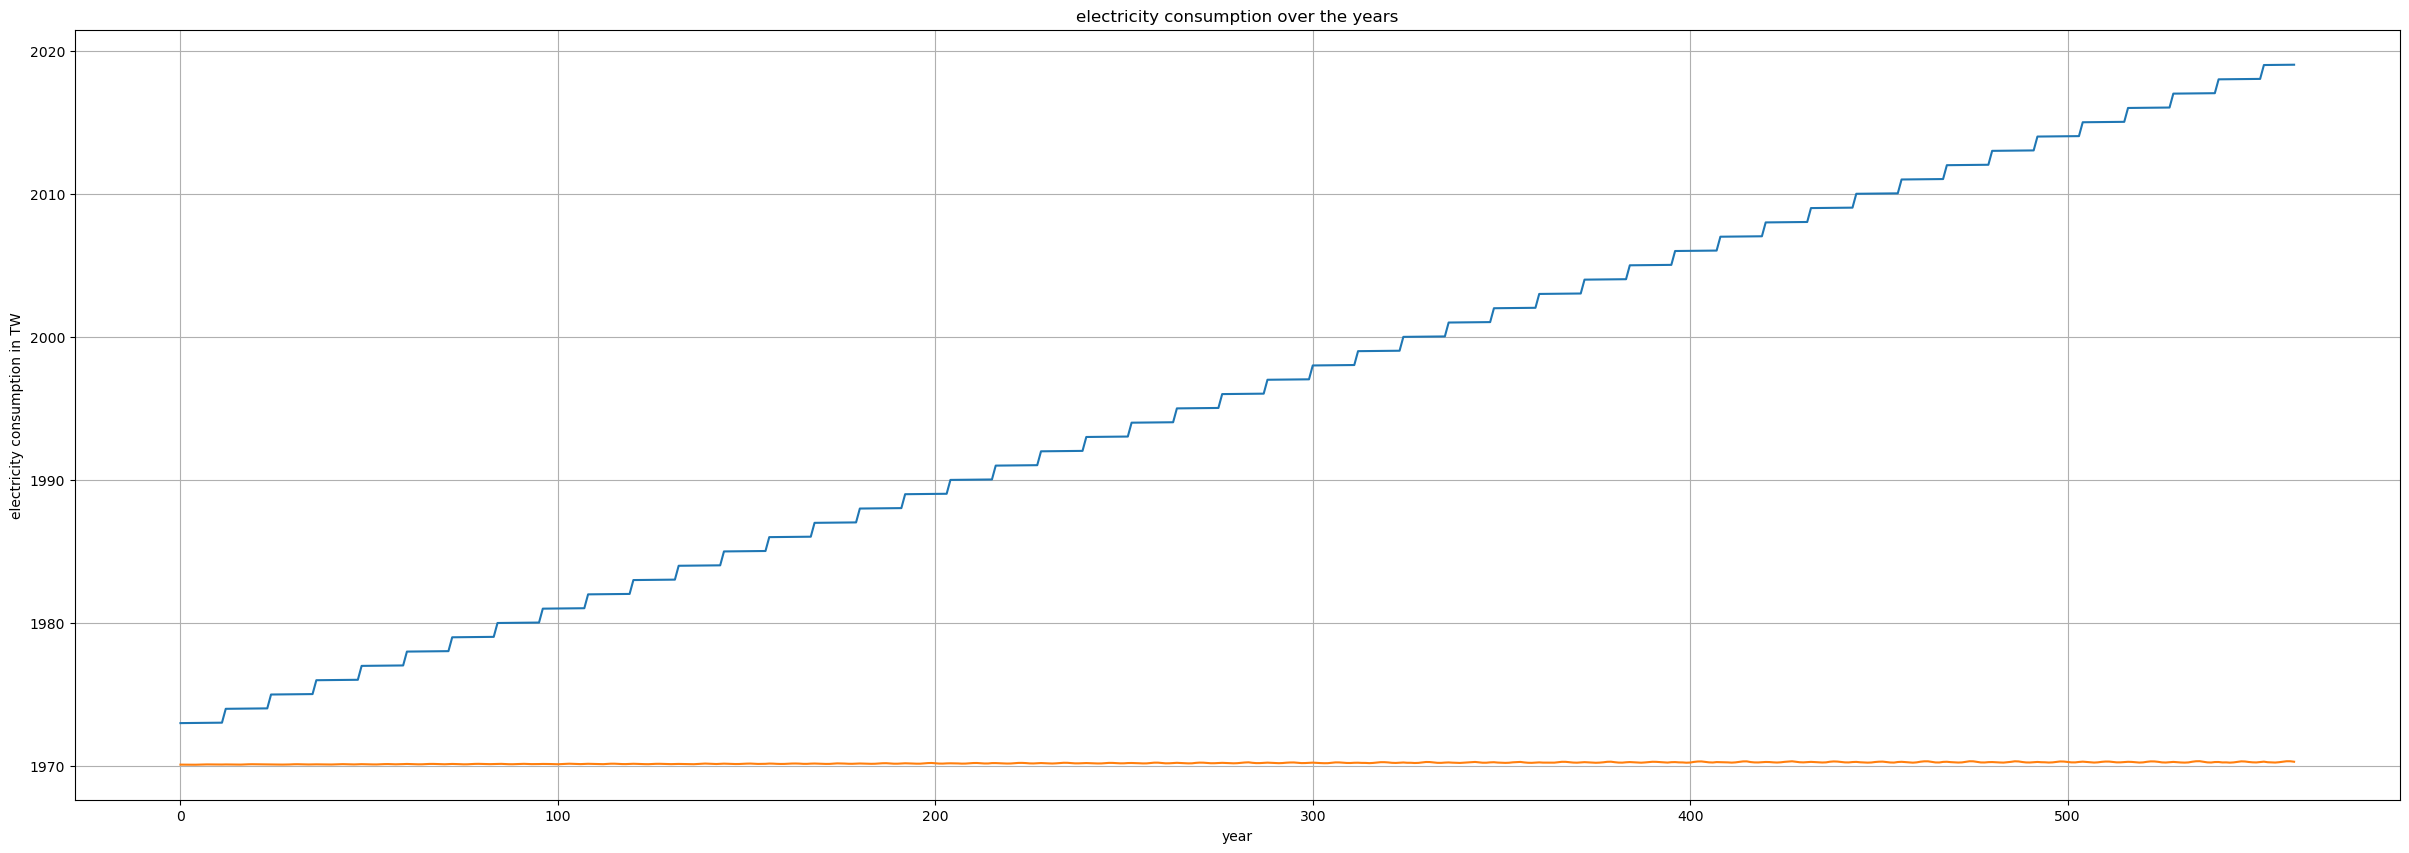

In [18]:
plt.figure(figsize=[30,10])
plt.plot(df)
plt.title("electricity consumption over the years")
plt.xlabel("year")
plt.ylabel("electricity consumption in TW")
plt.grid()

In [7]:
df_pivot = pd.pivot_table(df,index=df.index.year,columns=df.index.month,values='Electricty_Consumption_in_TW')

In [8]:
df_pivot.index.max()- df_pivot.index.min()

46

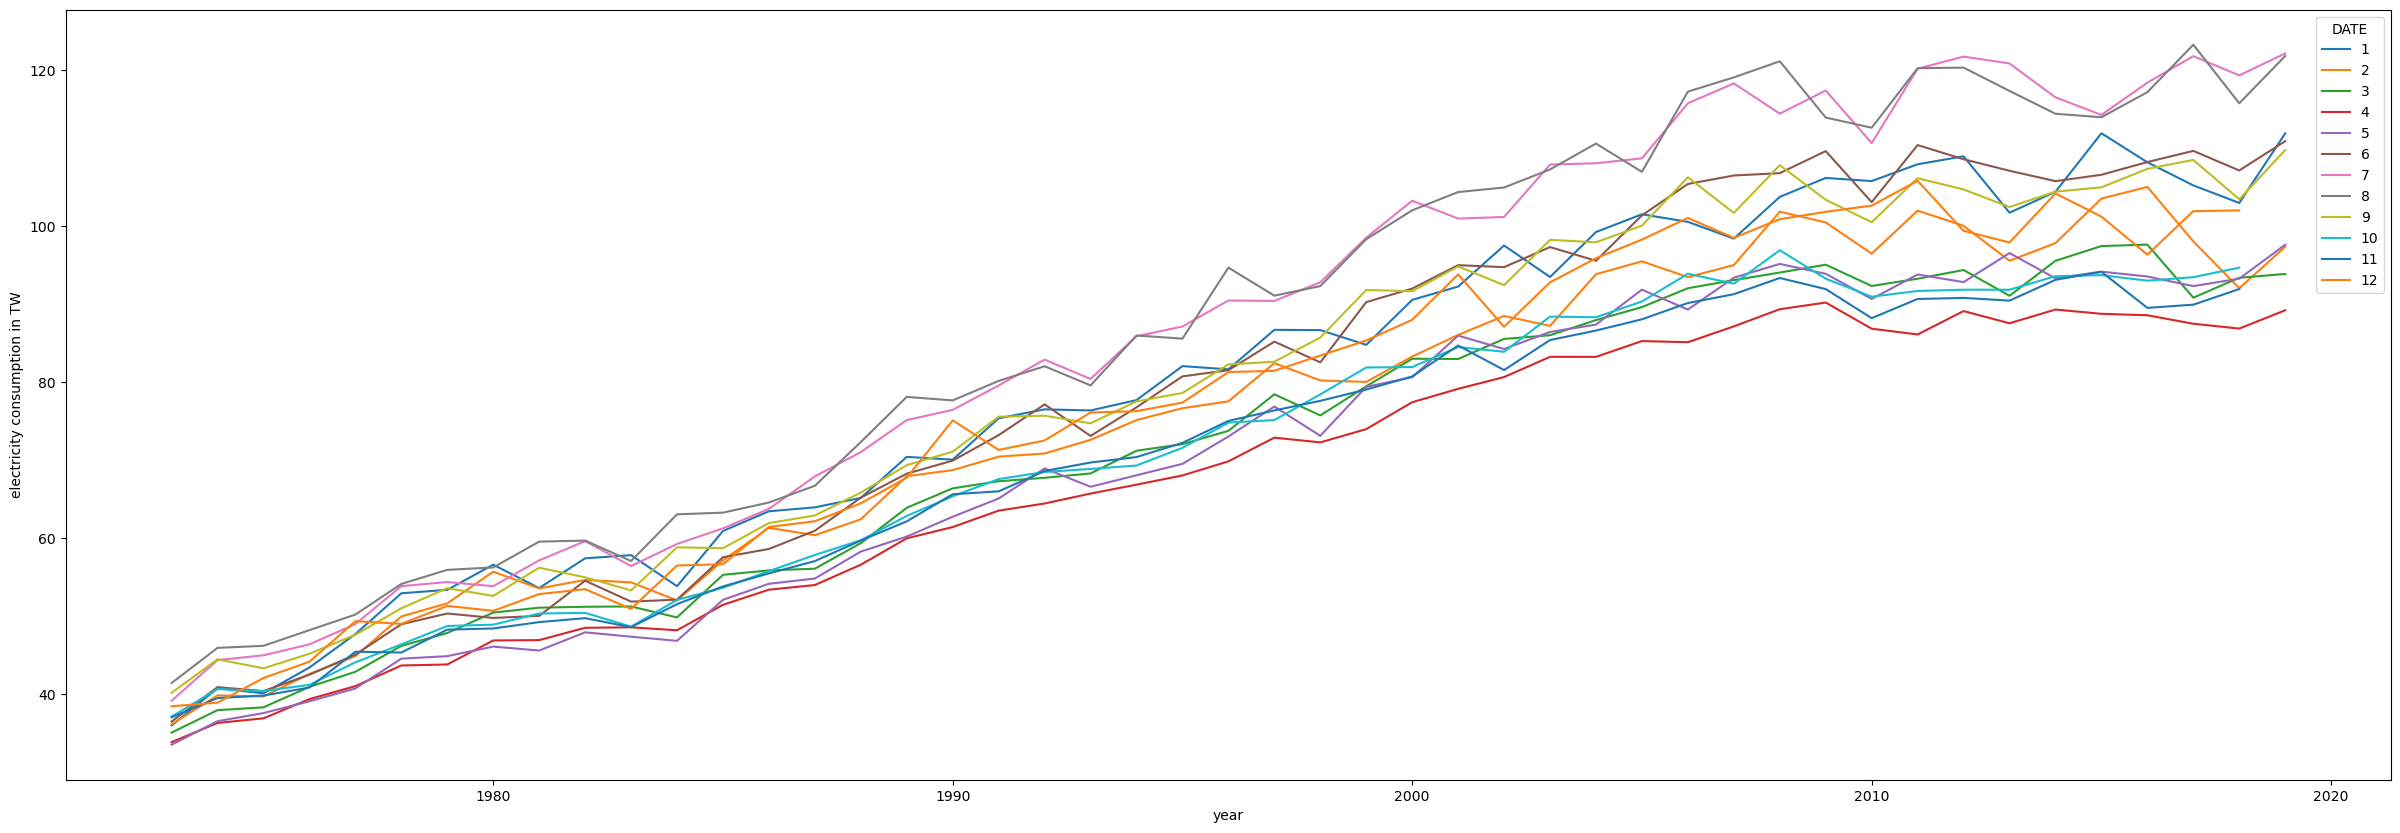

In [9]:
df_pivot.plot(kind='line',figsize=[30,10],xlabel='year',ylabel='electricity consumption in TW')
plt.show()

<Axes: xlabel='DATE'>

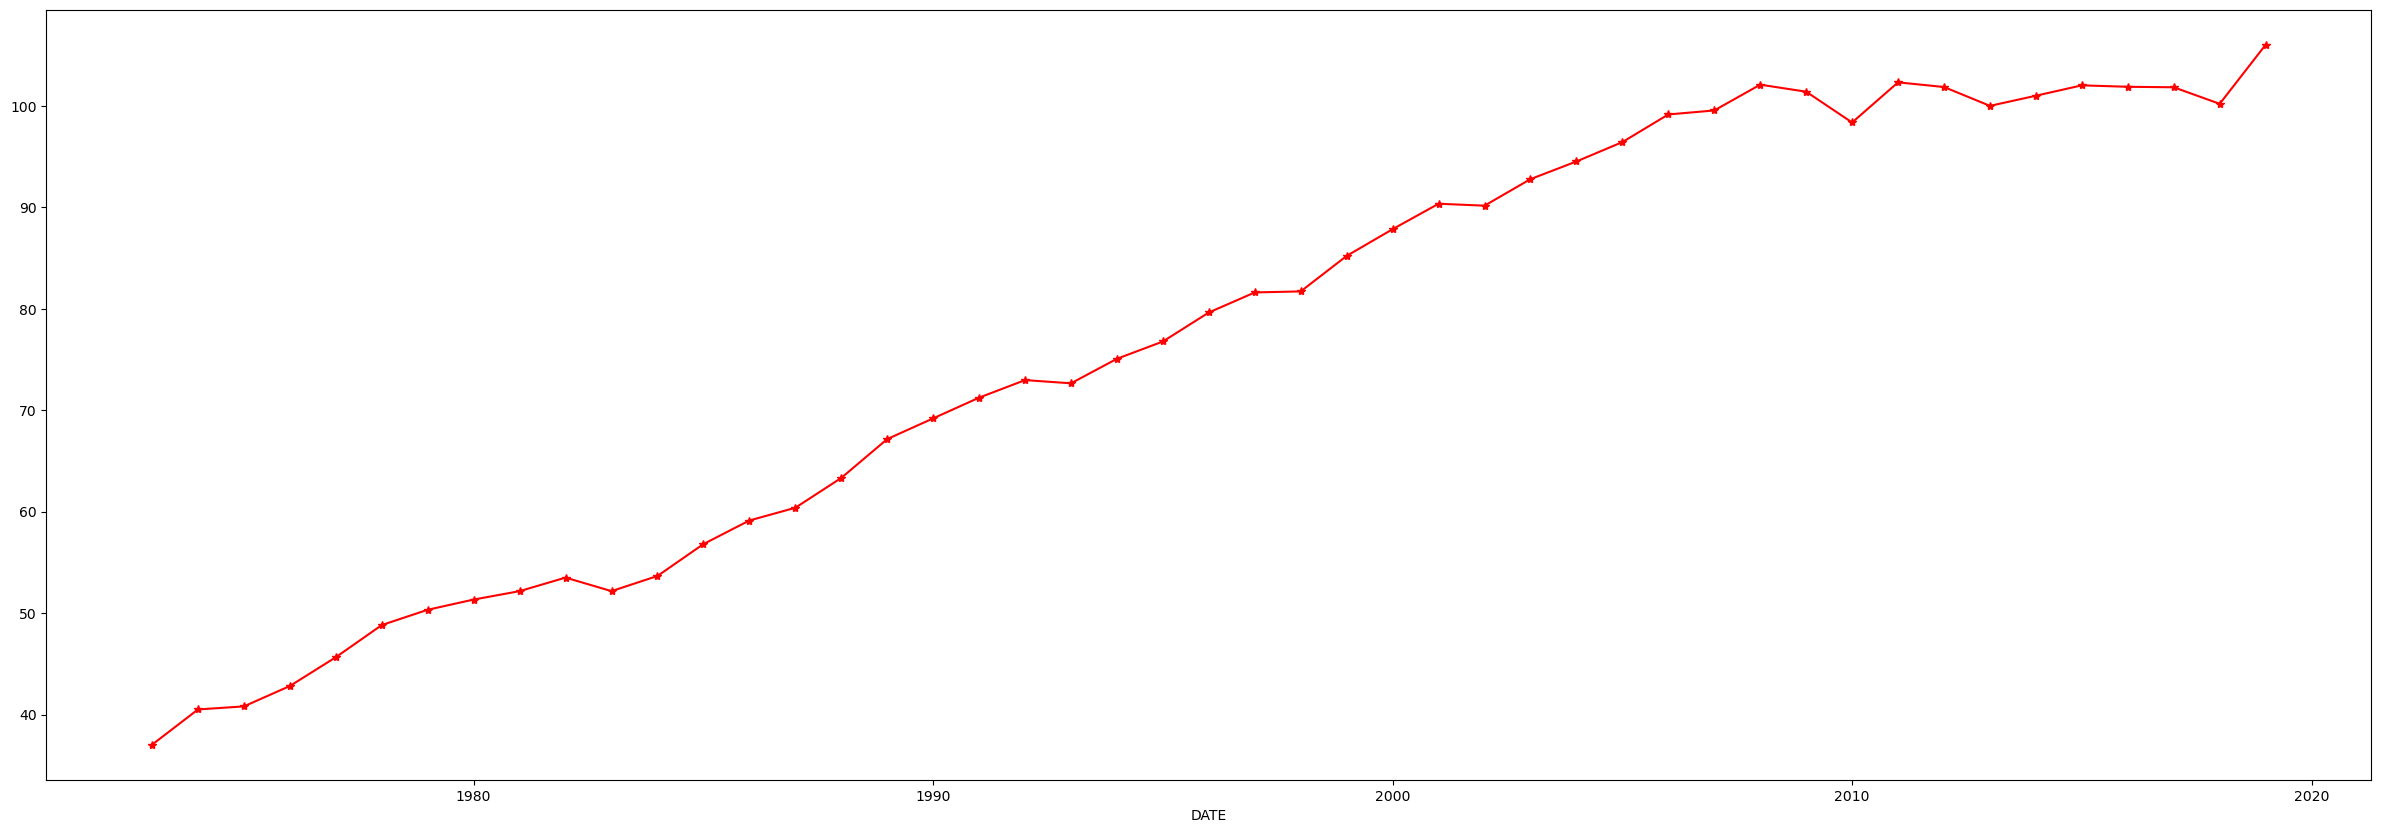

In [10]:
df_pivot.mean(axis=1).plot(kind='line',figsize=[30,10],marker='*',color = 'red')

In [11]:
#  from the above two charts we can say their is a trend in the given data.
#  it means there is an incrase in the consumption of electricity in the every year

<Axes: xlabel='DATE', ylabel='DATE'>

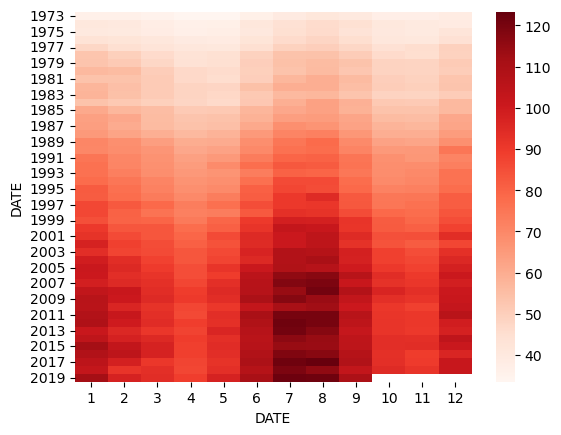

In [12]:
sns.heatmap(df_pivot,cmap='Reds')

In [13]:
#  from the above heat map gives the increment in the consumption of electicy and utlisation of electricity is more in the july august and september months
#  its a seasonlality phenomen

In [14]:
df_pivot.T   #---> T indicate the transpose  of the table

DATE     1973     1974     1975     1976     1977     1978     1979     1980  \
DATE                                                                           
1     35.9728  40.7455  40.0956  43.4099  47.6892  52.9153  53.3617  56.5838   
2     36.1334  39.8340  39.6944  42.5826  44.8505  49.9488  51.6279  55.6802   
3     35.0625  37.9408  38.3040  40.9244  42.8557  46.1749  47.8264  50.4428   
4     33.8416  36.3004  36.8939  39.3533  41.0177  43.6652  43.7935  46.8693   
5     33.5107  36.5293  37.5668  39.0766  40.7201  44.5402  44.8591  46.0886   
6     36.4823  40.8899  40.3832  42.4851  45.0610  48.9480  50.3292  49.7595   
7     39.1412  44.3563  44.9671  46.3693  48.9685  53.8292  54.3579  53.8273   
8     41.4137  45.9240  46.1853  48.1945  50.1898  54.1182  55.9197  56.2272   
9     40.1639  44.4555  43.3001  45.1688  47.5982  50.9980  53.5776  52.5737   
10    37.1133  40.6417  40.3836  41.1880  44.0684  46.3711  48.7261  48.8947   
11    37.0248  39.4901  39.8092  40.8431  45.4267  45.3267  48.2585  48.4081   
12    38.4341  38.9068  42.0597  44.1468  49.3447  49.0027  51.3008  50.6659   

DATE     1981     1982  ...      2010      2011      2012      2013      2014  \
DATE                    ...                                                     
1     53.5867  57.4002  ...  105.7413  107.8967  108.9151  101.6890  104.3752   
2     53.5461  54.6248  ...   96.4428  101.9572  100.0117   95.5366   97.7907   
3     51.0708  51.1896  ...   92.2986   93.2285   94.3484   91.0434   95.5280   
4     46.9172  48.4958  ...   86.8242   86.0874   89.0821   87.5189   89.2783   
5     45.5795  47.9140  ...   90.6389   93.7706   92.7937   96.5166   93.2729   
6     50.0235  54.5292  ...  103.0377  110.3572  108.5421  107.0627  105.7336   
7     57.1384  59.5975  ...  110.6045  120.1457  121.6974  120.8149  116.4651   
8     59.5376  59.6727  ...  112.5792  120.2087  120.2822  117.2932  114.3700   
9     56.1935  54.9644  ...  100.4701  106.1109  104.6692  102.4185  104.3899   
10    50.3249  50.4093  ...   90.9259   91.6614   91.8217   91.8143   93.5507   
11    49.2234  49.7304  ...   88.1769   90.6340   90.7683   90.4217   93.0872   
12    52.8176  53.4477  ...  102.5951  105.7792   99.3654   97.8702  104.1544   

DATE      2015      2016      2017      2018      2019  
DATE                                                    
1     111.8708  108.1515  105.1879  102.9398  111.8520  
2     103.4990  104.9900   98.0069   92.0095   97.3261  
3      97.4134   97.5969   90.8029   93.3526   93.8406  
4      88.7323   88.5477   87.4594   86.8386   89.1873  
5      94.1360   93.5168   92.2811   93.2361   97.5860  
6     106.5504  108.1813  109.6104  107.1009  110.8580  
7     114.2235  118.3568  121.7478  119.2874  122.1014  
8     113.9230  117.1375  123.2163  115.7108  121.7765  
9     104.9454  107.3046  108.4514  103.4070  109.7190  
10     93.6892   92.9818   93.4264   94.6492       NaN  
11     94.1108   89.4954   89.9026   91.9079       NaN  
12    101.1895   96.3086  101.8836  101.9883       NaN  

[12 rows x 47 columns]

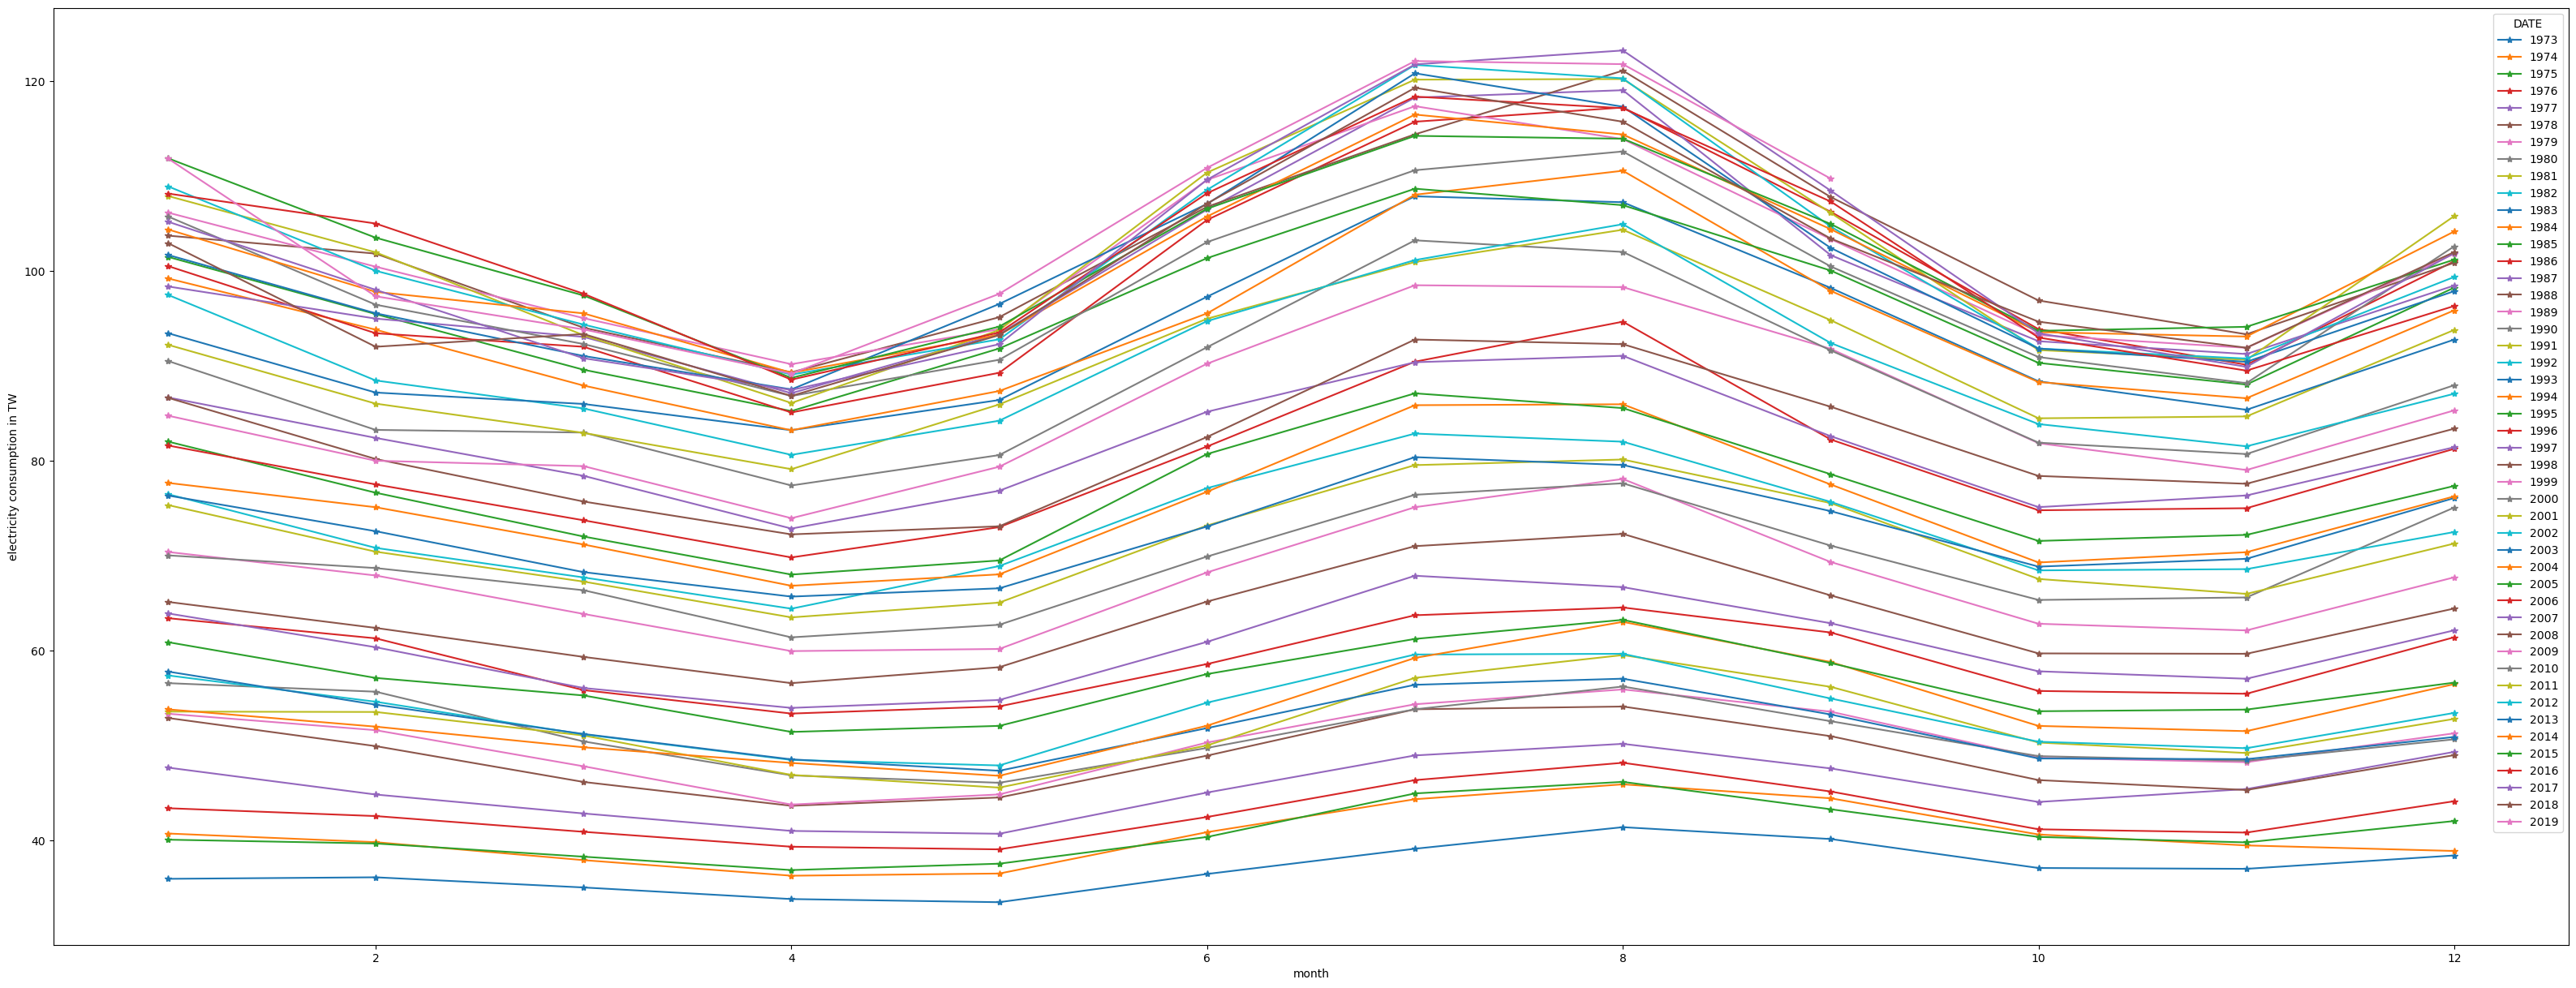

In [15]:
df_pivot.T.plot(kind='line',figsize=[40,15],xlabel='month',ylabel='electricity consumption in TW',marker='*')
plt.show()

In [16]:
# from the above graph we can say that their is a seasonality in the data that is consumption is varies over the months

# Decomposation analysis

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
df_decompose = seasonal_decompose(df['Electricty_Consumption_in_TW'],model='multiplicative')


In [19]:
decompose=pd.concat([df_decompose.observed,df_decompose.trend,df_decompose.seasonal,df_decompose.resid],axis=1)
decompose.dropna(inplace=True)
decompose

Electricty_Consumption_in_TW       trend  seasonal     resid
DATE                                                                    
1973-07-01                       39.1412   37.223388  1.125749  0.934064
1973-08-01                       41.4137   37.576442  1.136105  0.970085
1973-09-01                       40.1639   37.850562  1.038776  1.021507
1973-10-01                       37.1133   38.072942  0.936702  1.040667
1973-11-01                       37.0248   38.301167  0.924028  1.046154
...                                  ...         ...       ...       ...
2018-11-01                       91.9079  101.805712  0.924028  0.977002
2018-12-01                      101.9883  102.143504  1.001358  0.997126
2019-01-01                      111.8520  102.417300  1.055358  1.034834
2019-02-01                       97.3261  102.787287  0.996086  0.950590
2019-03-01                       93.8406  103.303025  0.945337  0.960928

[549 rows x 4 columns]

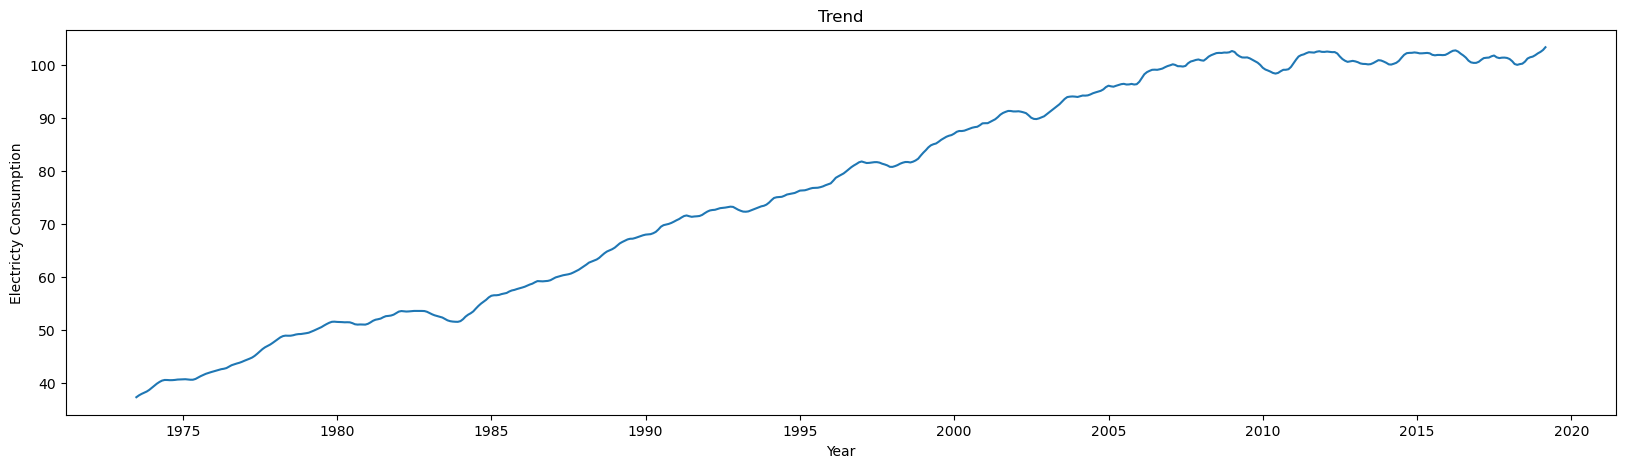

In [20]:
plt.figure(figsize=[20,5])
plt.title('Trend')
plt.plot(decompose.trend)
plt.ylabel('Electricty Consumption')
plt.xlabel('Year')
plt.show()

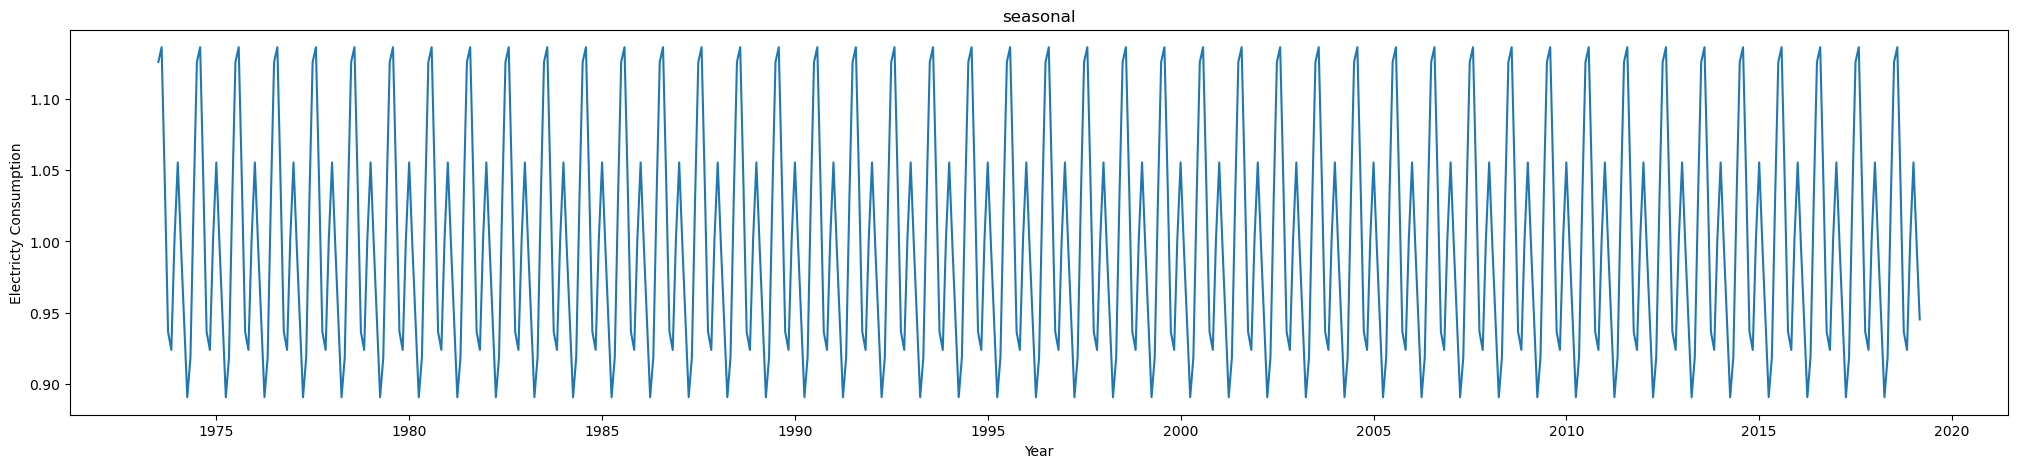

In [21]:
plt.figure(figsize=[25,5])
plt.title('seasonal')
plt.plot(decompose.seasonal)
plt.ylabel('Electricty Consumption')
plt.xlabel('Year')
plt.show()

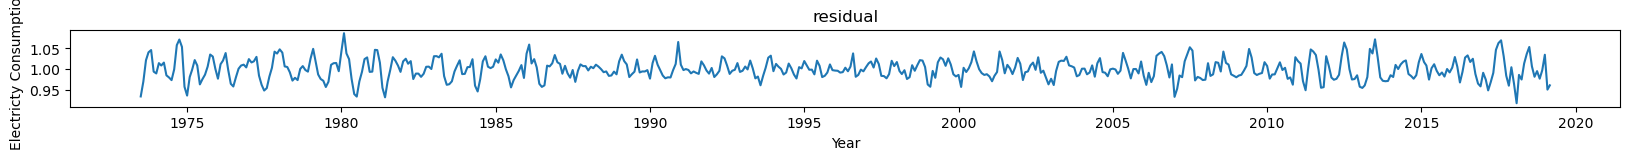

In [22]:
plt.figure(figsize=[20,1])
plt.title('residual')
plt.plot(decompose.resid)
plt.ylabel('Electricty Consumption')
plt.xlabel('Year')
plt.show()

# Roalling statistics     

### it is the moving average

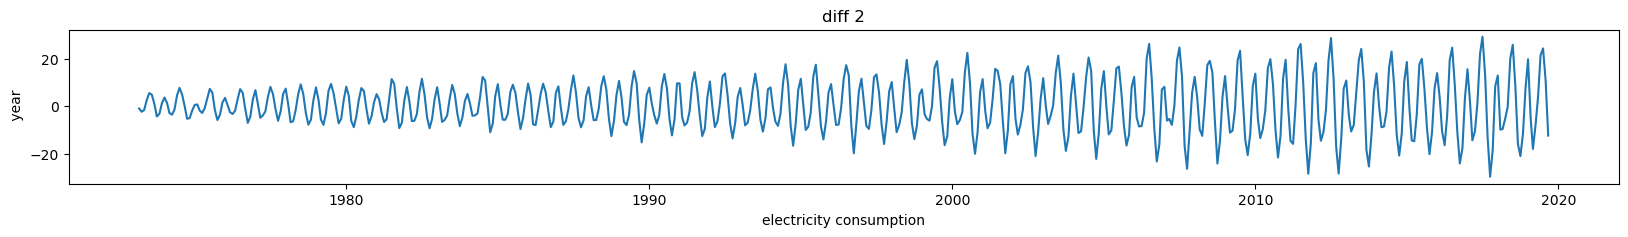

In [23]:
plt.figure(figsize=[20,2])
plt.title("diff 2")
plt.plot(df.Electricty_Consumption_in_TW.diff(periods=2))          # -->like lag function in sql
plt.xlabel('electricity consumption')
plt.ylabel(" year")
plt.show()

# Roalling mean

In [24]:
df['Electricty_Consumption_in_TW'].rolling(5).mean()

DATE
1973-01-01          NaN
1973-02-01          NaN
1973-03-01          NaN
1973-04-01          NaN
1973-05-01     34.90420
                ...    
2019-05-01     97.95840
2019-06-01     97.75960
2019-07-01    102.71466
2019-08-01    108.30184
2019-09-01    112.40818
Name: Electricty_Consumption_in_TW, Length: 561, dtype: float64

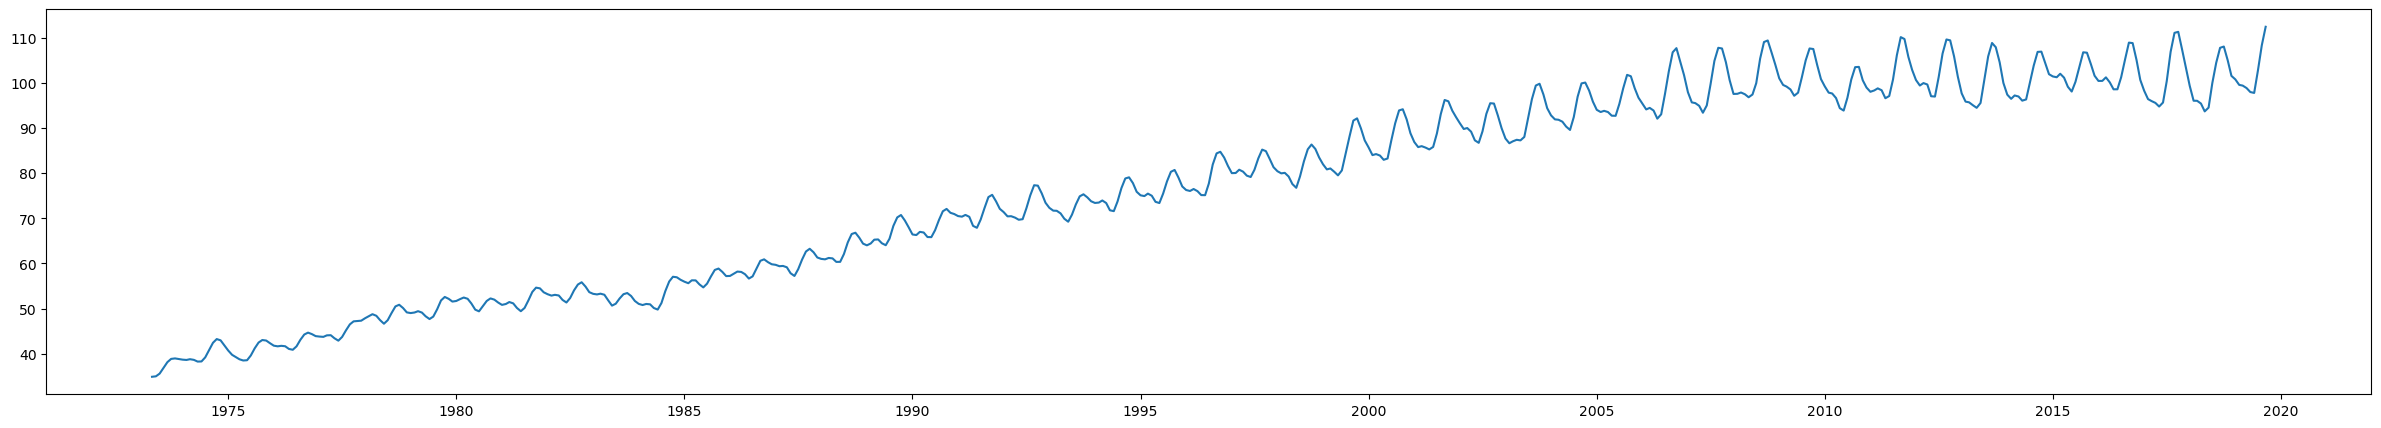

In [25]:
plt.figure(figsize=[30,5])
plt.plot(df.Electricty_Consumption_in_TW.rolling(5).mean())
plt.show()

# exponential weighted moving average

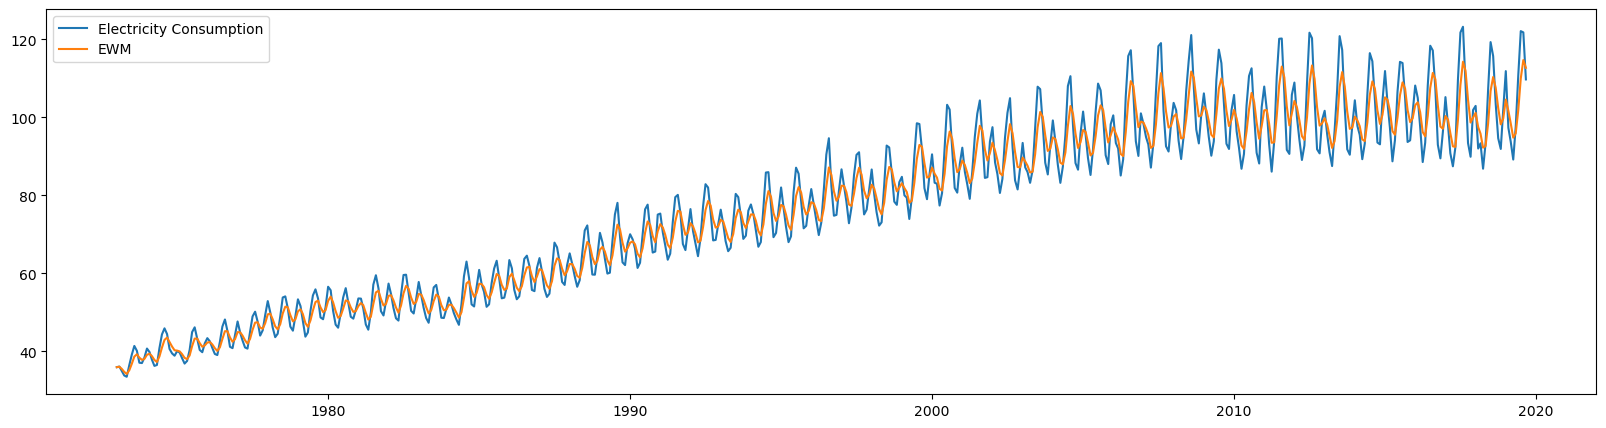

In [26]:
plt.figure(figsize=[20,5])
plt.plot(df.Electricty_Consumption_in_TW,label='Electricity Consumption')
plt.plot(df.Electricty_Consumption_in_TW.ewm(alpha=0.4).mean(),label='EWM')
plt.legend()
plt.show()

# model building

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

ADF TEST

In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
adf=adfuller(df.diff().dropna())
pd.Series(adf[0:4],index=['Test statistics','p_vale','Lags_Used','Number_of Observations'])

Test statistics          -7.941665e+00
p_vale                    3.301344e-12
Lags_Used                 1.400000e+01
Number_of Observations    5.450000e+02
dtype: float64

# ACF and PACF

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


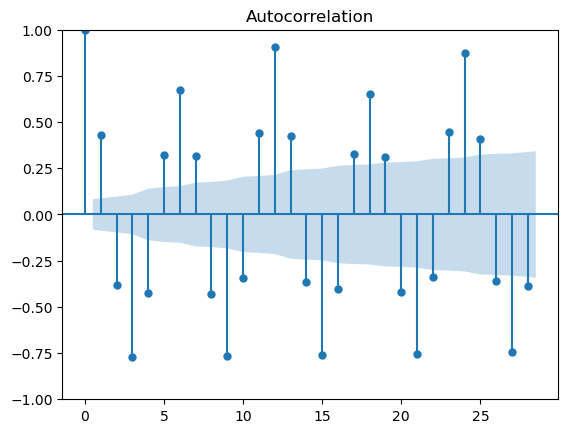

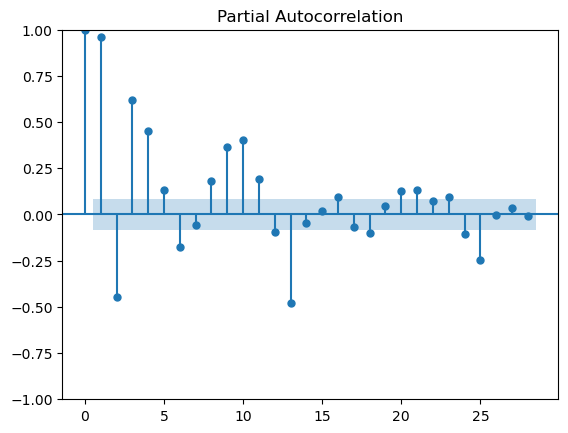

In [31]:
plot_acf(df.diff().dropna())
plot_pacf(df.dropna())
plt.show()

# ARIMA Model

In [32]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error

In [ ]:
# root mean squared error 
# root mean squared percentage error

In [33]:
def RMSE(actual,predicted):
    return np.sqrt(mean_squared_error)

def RMSPE(actual,predicted):
    actual=np.array(actual)   # Actual Values are converted in to array.
    predicted=np.array(predicted) # predicted Values are converted in to array.
    percentage_error=(actual-predicted)/actual  #percentage Error
    mean_square_percentage_erroe=np.mean(percentage_error**2) #mean of percentage error
    rmspe=np.sqrt(mean_square_percentage_erroe) #square root of mean squared percentage error
    return rmspe

In [ ]:
# trian test split, where train is 80 of data, and test is 20 percent of data

In [34]:
train_length=int(len(df)*0.8)

In [35]:
train=df.iloc[0:train_length]
train

Electricty_Consumption_in_TW
DATE                                    
1973-01-01                       35.9728
1973-02-01                       36.1334
1973-03-01                       35.0625
1973-04-01                       33.8416
1973-05-01                       33.5107
...                                  ...
2009-12-01                      101.8014
2010-01-01                      105.7413
2010-02-01                       96.4428
2010-03-01                       92.2986
2010-04-01                       86.8242

[448 rows x 1 columns]

In [36]:
test=df.iloc[train_length:]
test

Electricty_Consumption_in_TW
DATE                                    
2010-05-01                       90.6389
2010-06-01                      103.0377
2010-07-01                      110.6045
2010-08-01                      112.5792
2010-09-01                      100.4701
...                                  ...
2019-05-01                       97.5860
2019-06-01                      110.8580
2019-07-01                      122.1014
2019-08-01                      121.7765
2019-09-01                      109.7190

[113 rows x 1 columns]

In [37]:
model=ARIMA(train,order=(2,1,2))
model_fit=model.fit()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
# back word testing
backward_predict=model_fit.predict()

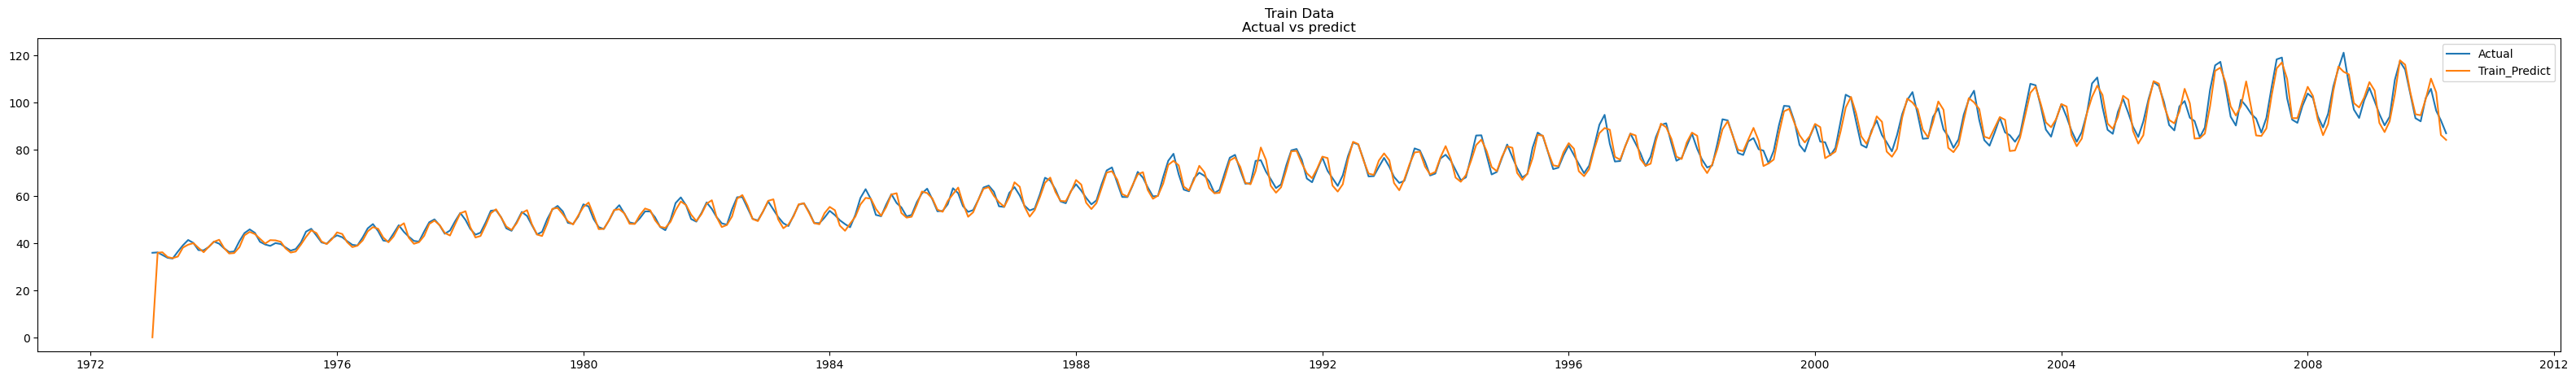

In [39]:
plt.figure(figsize=[40,5])
plt.title('Train Data\nActual vs predict')
plt.plot(train,label='Actual')
plt.plot(backward_predict,label='Train_Predict')
plt.legend()
plt.show()

In [40]:
# farward testing
forward_predict=model_fit.forecast(len(test))

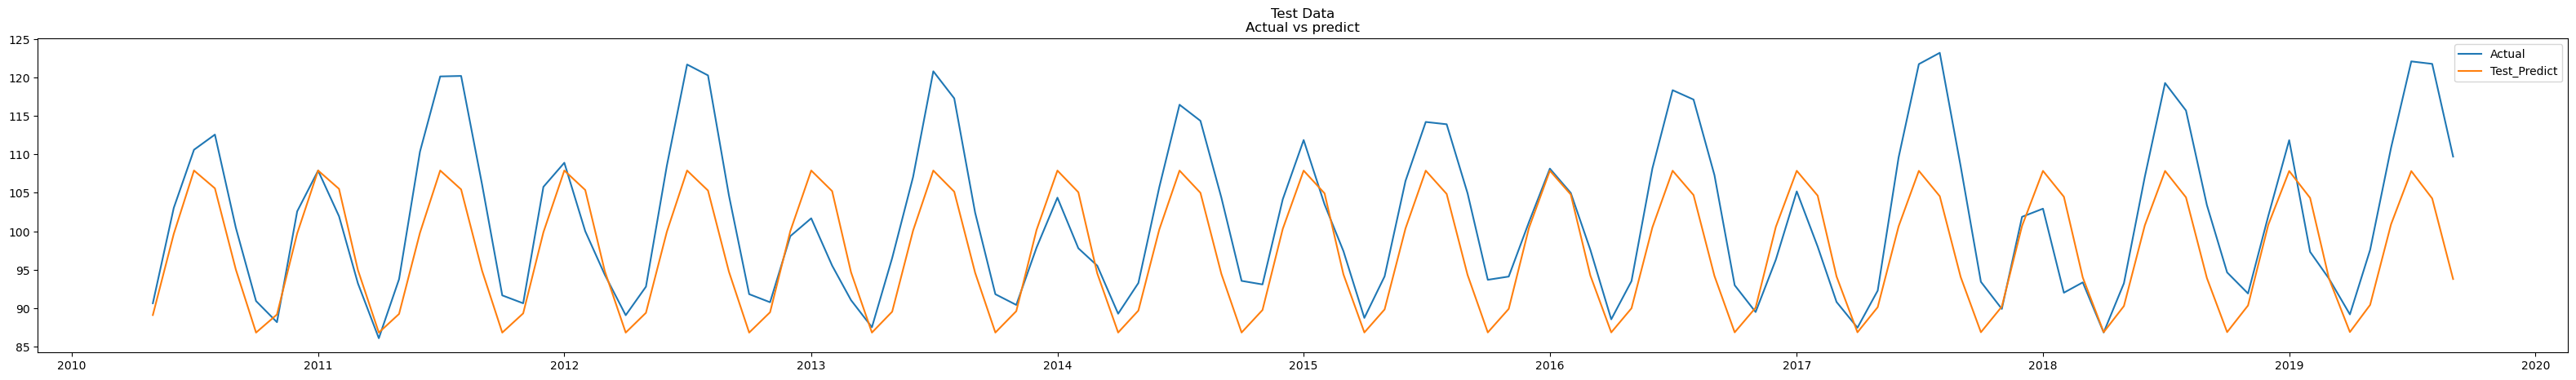

In [41]:
plt.figure(figsize=[40,5])
plt.title('Test Data\nActual vs predict')
plt.plot(test,label='Actual')
plt.plot(forward_predict,label='Test_Predict')
plt.legend()
plt.show()

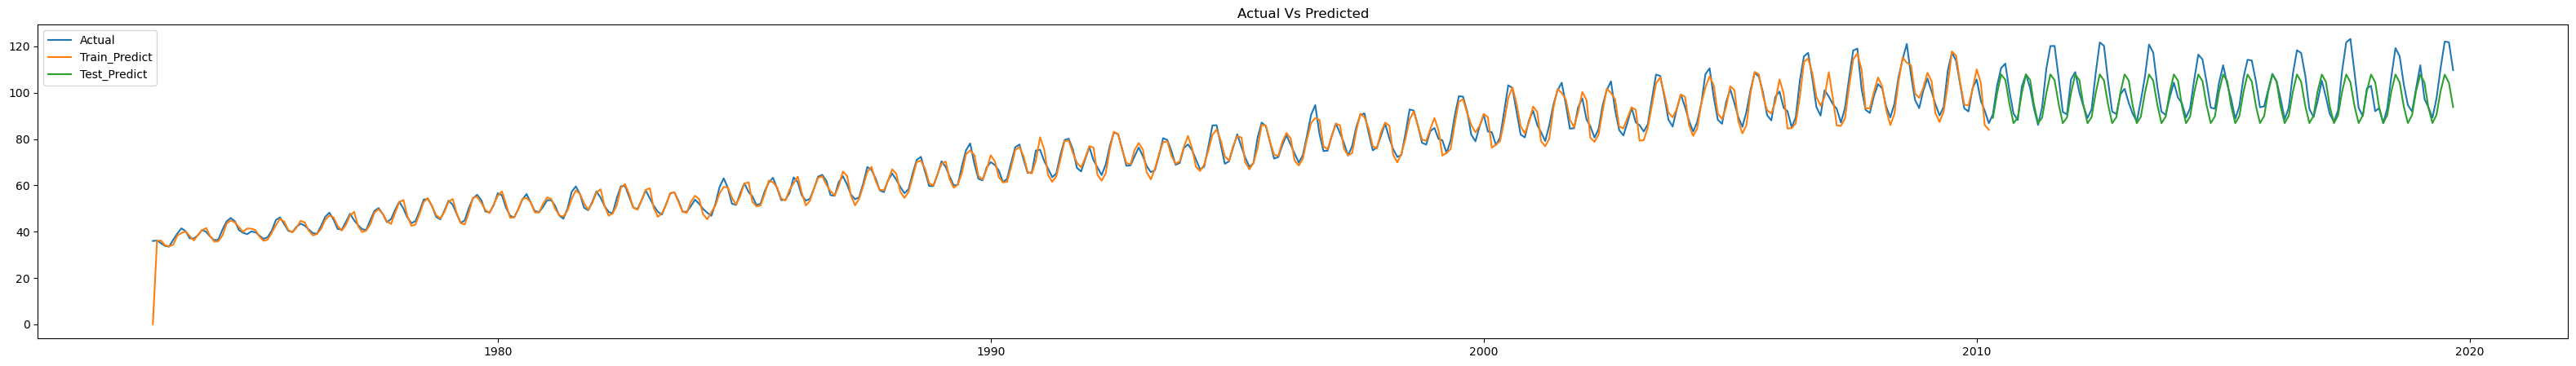

In [42]:
plt.figure(figsize=[40,5])
plt.title('Actual Vs Predicted')
plt.plot(df,label='Actual')
plt.plot(backward_predict,label='Train_Predict')
plt.plot(forward_predict,label='Test_Predict')
plt.legend()
plt.show()

<span style='color:orange'>
From athe above Results we can say that our model is working very well on the training data but not testing data.

Our model is not capturing the eaxct pattern for testing data.

For better model we need to iterate model with different values of p, d and q.


In [49]:
%%time
warnings.filterwarnings('ignore')
order_list=[]
rmse_list,rmspe_list,mape_list,aic_list=[],[],[],[]

p_range=range(1,5)
d_range=range(1,3)
q_range=range(1,5)
for i in list(itertools.product(p_range,d_range,q_range)):
            model=ARIMA(train,order=i)
            model_fit=model.fit()
            forcast=model_fit.forecast(len(test))
            aic_list.append(model_fit.aic)
            order_list.append(i)
            rmse_list.append(np.sqrt(mean_squared_error(test,forcast)))
            rmspe_list.append(RMSPE(test,forcast))
            mape_list.append(mean_absolute_percentage_error(test,forcast))
            

CPU times: total: 30.9 s
Wall time: 22.9 s


In [50]:
metric_list=pd.DataFrame({'Order_list':order_list,'AIC_score':aic_list,'RMSE':rmse_list,'RMSPE':rmspe_list,'MAPE':mape_list})
metric_list

Order_list    AIC_score        RMSE     RMSPE      MAPE
0   (1, 1, 1)  2589.555234   22.427358  0.204626  0.189124
1   (1, 1, 2)  2494.027500   10.844607  0.098672  0.083293
2   (1, 1, 3)  2442.573583   10.799978  0.098423  0.083256
3   (1, 1, 4)  2397.357081   10.687713  0.097691  0.083105
4   (1, 2, 1)  2696.626700   16.776622  0.151168  0.125124
5   (1, 2, 2)  2591.570920   17.643303  0.159434  0.134299
6   (1, 2, 3)  2582.918342   17.905988  0.161869  0.137069
7   (1, 2, 4)  2574.133991   17.681505  0.159708  0.134603
8   (2, 1, 1)  2296.867222   10.841050  0.099971  0.080247
9   (2, 1, 2)  2126.050187    7.356836  0.124741  0.054653
10  (2, 1, 3)  2135.810946    8.331621  0.122390  0.061537
11  (2, 1, 4)  2323.236758   10.797266  0.099490  0.080933
12  (2, 2, 1)  2399.973553   11.652019  0.108542  0.087429
13  (2, 2, 2)  2280.454139   13.544893  0.148656  0.117565
14  (2, 2, 3)  2129.163306    8.155397  0.142785  0.064454
15  (2, 2, 4)  2125.393509    8.261840  0.143838  0.065362
16  (3, 1, 1)  2290.852399   12.295515  0.111753  0.084251
17  (3, 1, 2)  2123.005565    7.172303  0.124164  0.052975
18  (3, 1, 3)  2130.039046    7.356806  0.124670  0.054640
19  (3, 1, 4)  2094.475982    6.667918  0.116904  0.048171
20  (3, 2, 1)  2298.776582   10.355764  0.107066  0.084412
21  (3, 2, 2)  2293.702517   10.348954  0.107907  0.084628
22  (3, 2, 3)  2149.019691    7.638432  0.130957  0.059886
23  (3, 2, 4)  2167.668749    7.800922  0.133915  0.061197
24  (4, 1, 1)  2272.590806   12.122187  0.111012  0.082993
25  (4, 1, 2)  2272.518472   12.094698  0.110919  0.082724
26  (4, 1, 3)  2127.751954    7.210682  0.124324  0.053350
27  (4, 1, 4)  2126.162849    7.047189  0.122735  0.051686
28  (4, 2, 1)  2359.691941   92.278091  0.901377  0.797682
29  (4, 2, 2)  2275.400762   10.286351  0.108571  0.084097
30  (4, 2, 3)  2257.437952  123.722240  1.257617  1.055006
31  (4, 2, 4)  2130.037090    8.335845  0.144537  0.066004

In [51]:
metric_list.sort_values('AIC_score').reset_index().drop(columns='index').loc[0]

Order_list      (3, 1, 4)
AIC_score     2094.475982
RMSE             6.667918
RMSPE            0.116904
MAPE             0.048171
Name: 0, dtype: object

In [52]:
metric_list.sort_values('RMSE').reset_index().drop(columns='index').loc[0]

Order_list      (3, 1, 4)
AIC_score     2094.475982
RMSE             6.667918
RMSPE            0.116904
MAPE             0.048171
Name: 0, dtype: object

In [53]:
metric_list.sort_values('RMSPE').reset_index().drop(columns='index').loc[0]

Order_list      (1, 1, 4)
AIC_score     2397.357081
RMSE            10.687713
RMSPE            0.097691
MAPE             0.083105
Name: 0, dtype: object

In [54]:
metric_list.sort_values('MAPE').reset_index().drop(columns='index').loc[0]

Order_list      (3, 1, 4)
AIC_score     2094.475982
RMSE             6.667918
RMSPE            0.116904
MAPE             0.048171
Name: 0, dtype: object

In [55]:
model=ARIMA(train,order=(3,1,4))
model_fit=model.fit()

# Backward test

In [56]:
backward_predict=model_fit.predict()

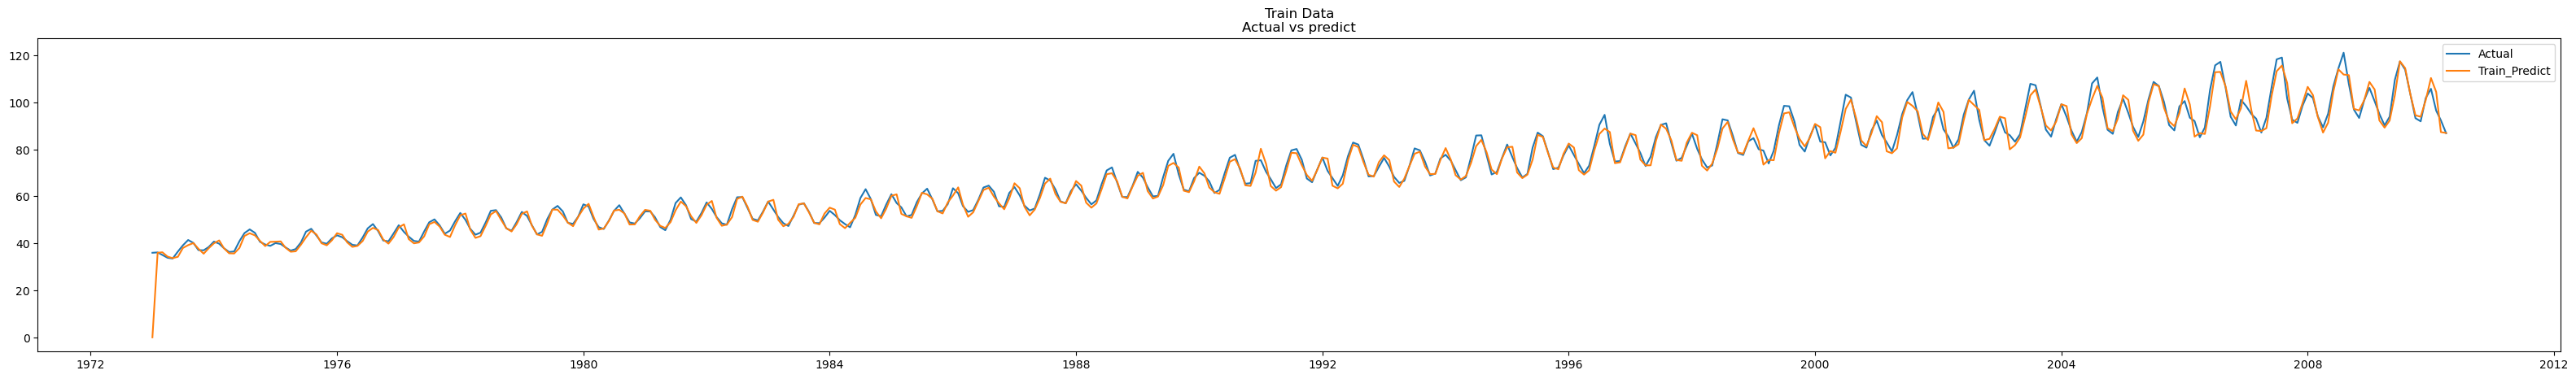

In [57]:
plt.figure(figsize=[40,5])
plt.title('Train Data\nActual vs predict')
plt.plot(train,label='Actual')
plt.plot(backward_predict,label='Train_Predict')
plt.legend()
plt.show()

# farward test

In [58]:
forward_predict=model_fit.forecast(len(test))

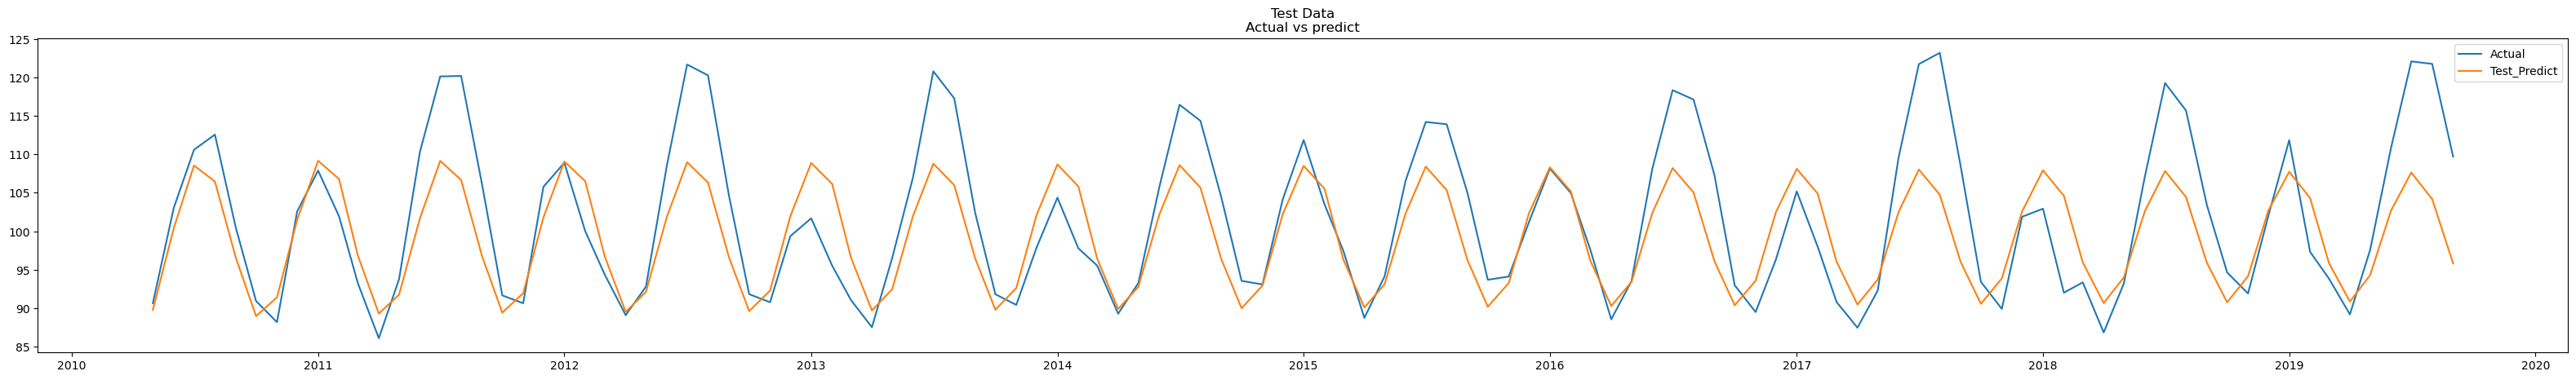

In [59]:
plt.figure(figsize=[40,5])
plt.title('Test Data\nActual vs predict')
plt.plot(test,label='Actual')
plt.plot(forward_predict,label='Test_Predict')
plt.legend()
plt.show()

# full forcast model

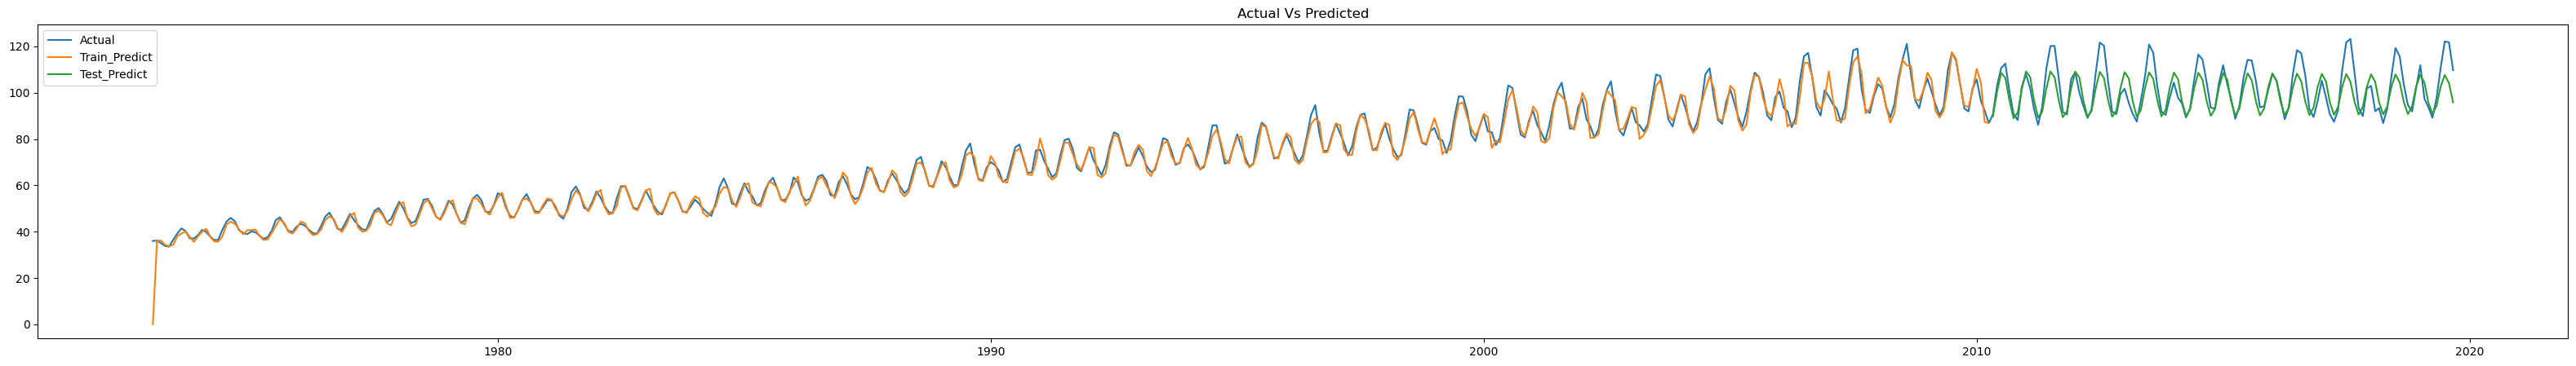

In [60]:
plt.figure(figsize=[40,5])
plt.title('Actual Vs Predicted')
plt.plot(df,label='Actual')
plt.plot(backward_predict,label='Train_Predict')
plt.plot(forward_predict,label='Test_Predict')
plt.legend()
plt.show()

In [61]:
# from the above outcomes we can say that our model performs well on train data but not on test data

# SARIMA model

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [63]:
%%time
import warnings
warnings.filterwarnings('ignore')
order_list=[]
seasonal_order_list=[]
rmse_list,rmspe_list,mape_list,aic_list=[],[],[],[]

p_range=range(1,3)
d_range=range(1,3)
q_range=range(1,3)
P_range=range(1,4)
D_range=range(1,3)
Q_range=range(1,5)
T=12
for i in list(itertools.product(p_range,d_range,q_range)):
    for j in list(itertools.product(P_range,D_range,Q_range)):
        model=SARIMAX(train,order=i,seasonal_order=j+(12,))
        model_fit=model.fit()
        forcast=model_fit.forecast(len(test))
        aic_list.append(model_fit.aic)
        order_list.append(i)
        seasonal_order_list.append(j)
        rmse_list.append(np.sqrt(mean_squared_error(test,forcast)))
        rmspe_list.append(RMSPE(test,forcast))
        mape_list.append(mean_absolute_percentage_error(test,forcast))

CPU times: total: 1h 52min 31s
Wall time: 57min 4s


In [64]:
sarima_list=pd.DataFrame({'Order':order_list,'Seasonal_Order':seasonal_order_list,'AIC_score':aic_list,'RMSE':rmse_list,'RMSPE':rmspe_list,'MAPE':mape_list})
sarima_list

Order Seasonal_Order    AIC_score       RMSE     RMSPE      MAPE
0    (1, 1, 1)      (1, 1, 1)  1668.064178   4.727555  0.142867  0.041181
1    (1, 1, 1)      (1, 1, 2)  1669.808467   4.992427  0.144043  0.043593
2    (1, 1, 1)      (1, 1, 3)  1636.722705   6.747656  0.163035  0.058198
3    (1, 1, 1)      (1, 1, 4)  1635.695611   6.218356  0.159896  0.053698
4    (1, 1, 1)      (1, 2, 1)  1748.960825   3.341051  0.139994  0.026869
..         ...            ...          ...        ...       ...       ...
187  (2, 2, 2)      (3, 1, 4)  1669.194895  17.711974  0.208195  0.146269
188  (2, 2, 2)      (3, 2, 1)  1680.659527   4.528202  0.143636  0.035575
189  (2, 2, 2)      (3, 2, 2)  1660.227770   9.596359  0.158763  0.074192
190  (2, 2, 2)      (3, 2, 3)  1662.004094   3.460523  0.141390  0.027276
191  (2, 2, 2)      (3, 2, 4)  1671.325420   2.766359  0.140939  0.021773

[192 rows x 6 columns]

In [65]:
sarima_list.sort_values('AIC_score').reset_index().drop(columns='index').loc[0]

Order               (1, 1, 2)
Seasonal_Order      (1, 1, 4)
AIC_score         1634.941062
RMSE                 5.477549
RMSPE                0.155897
MAPE                 0.046943
Name: 0, dtype: object

In [67]:
sarima_list.sort_values('RMSE').reset_index().drop(columns='index').loc[0]

Order              (2, 2, 2)
Seasonal_Order     (2, 2, 2)
AIC_score         1664.58172
RMSE                2.748378
RMSPE               0.141055
MAPE                0.021585
Name: 0, dtype: object

In [68]:
sarima_list.sort_values('RMSPE').reset_index().drop(columns='index').loc[0]

Order               (2, 2, 2)
Seasonal_Order      (1, 1, 2)
AIC_score         1676.471223
RMSE                 2.871258
RMSPE                0.132122
MAPE                 0.023465
Name: 0, dtype: object

In [69]:
sarima_list.sort_values('MAPE').reset_index().drop(columns='index').loc[0]

Order               (1, 2, 1)
Seasonal_Order      (3, 2, 4)
AIC_score         1707.259158
RMSE                 2.759085
RMSPE                0.141711
MAPE                 0.021205
Name: 0, dtype: object

In [70]:
model=SARIMAX(train,order=(1,2,1),seasonal_order=(3,2,4,12))
model_fit=model.fit()

In [71]:
# Backward test
backward_predict=model_fit.predict()

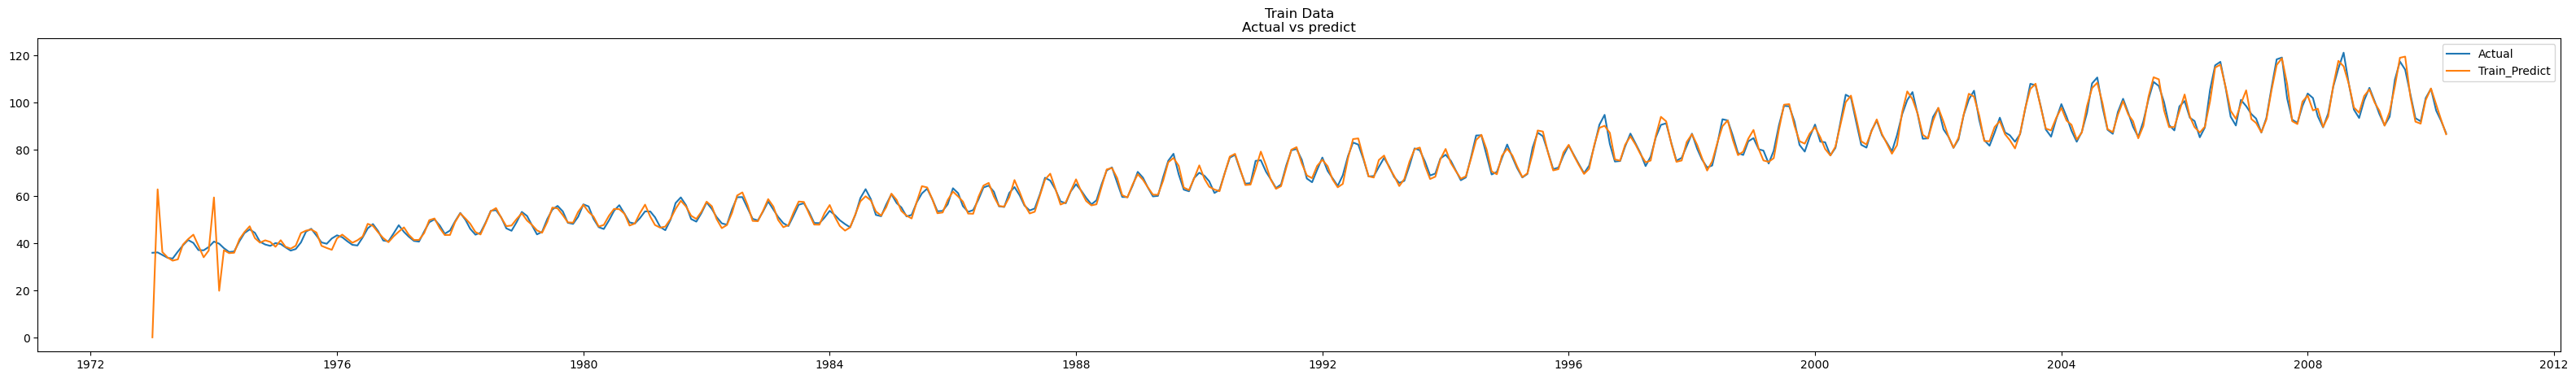

In [72]:
plt.figure(figsize=[40,5])
plt.title('Train Data\nActual vs predict')
plt.plot(train,label='Actual')
plt.plot(backward_predict,label='Train_Predict')
plt.legend()
plt.show()

In [73]:
# farward test
forward_predict=model_fit.forecast(len(test))

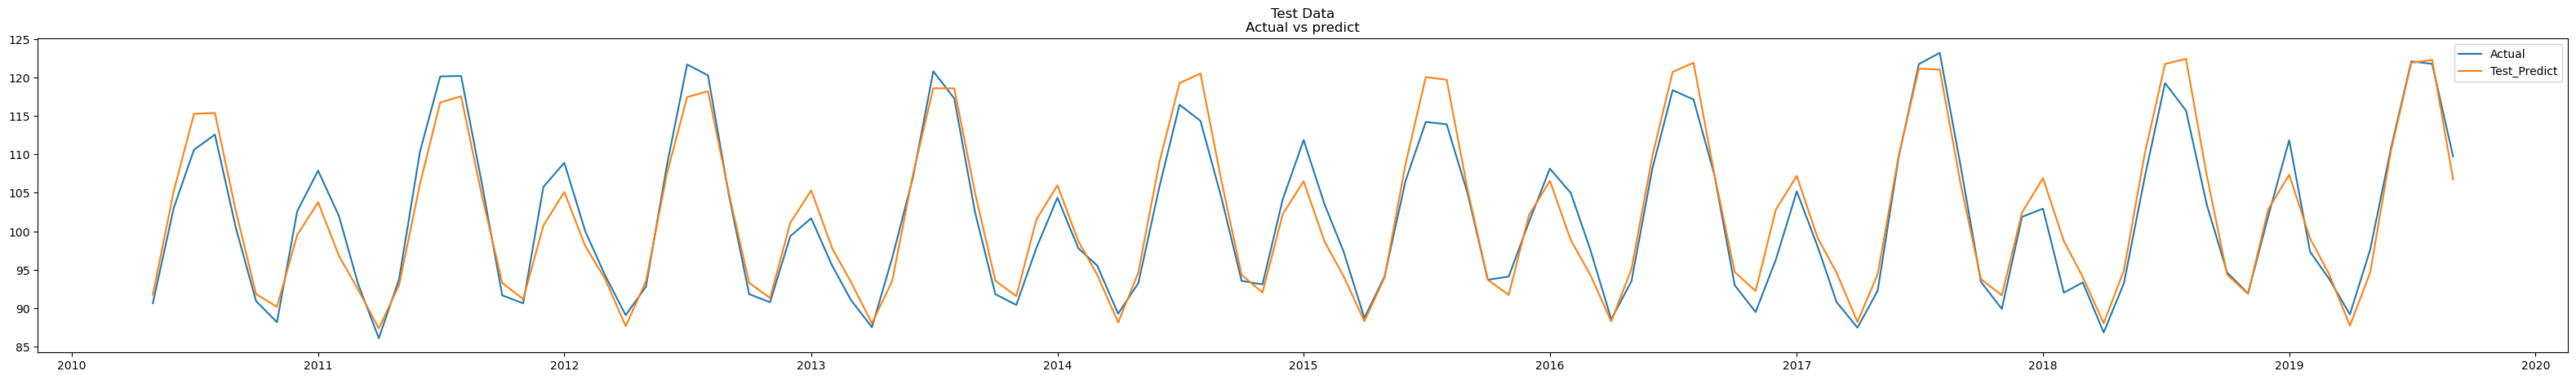

In [74]:
plt.figure(figsize=[40,5])
plt.title('Test Data\nActual vs predict')
plt.plot(test,label='Actual')
plt.plot(forward_predict,label='Test_Predict')
plt.legend()
plt.show()

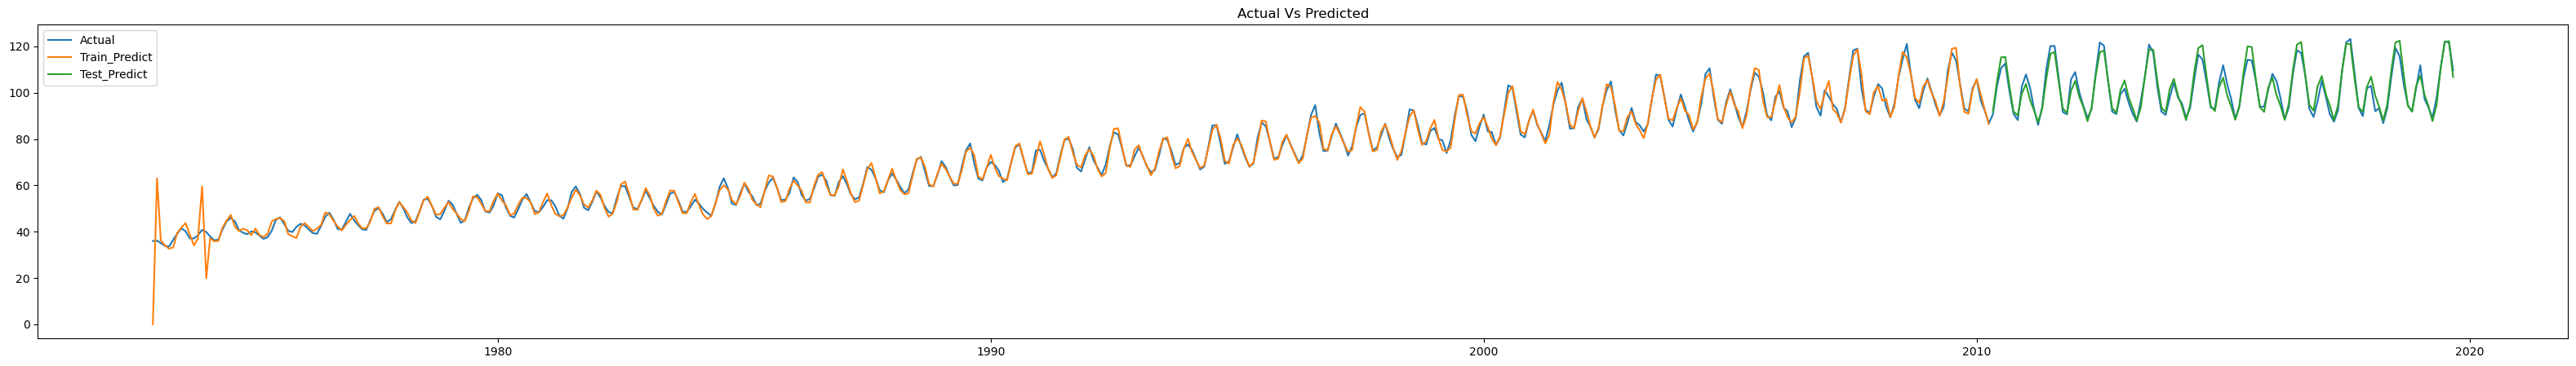

In [75]:
# fullfore cast test
plt.figure(figsize=[40,5])
plt.title('Actual Vs Predicted')
plt.plot(df,label='Actual')
plt.plot(backward_predict,label='Train_Predict')
plt.plot(forward_predict,label='Test_Predict')
plt.legend()
plt.show()

## next two years of electricity demand

In [76]:
model=SARIMAX(df,order=(1,2,1),seasonal_order=(3,2,4,12))
model_fit=model.fit()
forecast=model_fit.forecast(24)

In [77]:
print(f' AIC:  {model_fit.aic} \n RMSE:  {np.sqrt(mean_squared_error(test,forcast))}\n RMSPE:  {RMSPE(test,forcast)}\n mean_absolute_percentage_error:  {mean_absolute_percentage_error(test,forcast)}')

 AIC:  2279.7324374798773 
 RMSE:  2.7663587782119117
 RMSPE:  0.14093918140886078
 mean_absolute_percentage_error:  0.021772584810565366


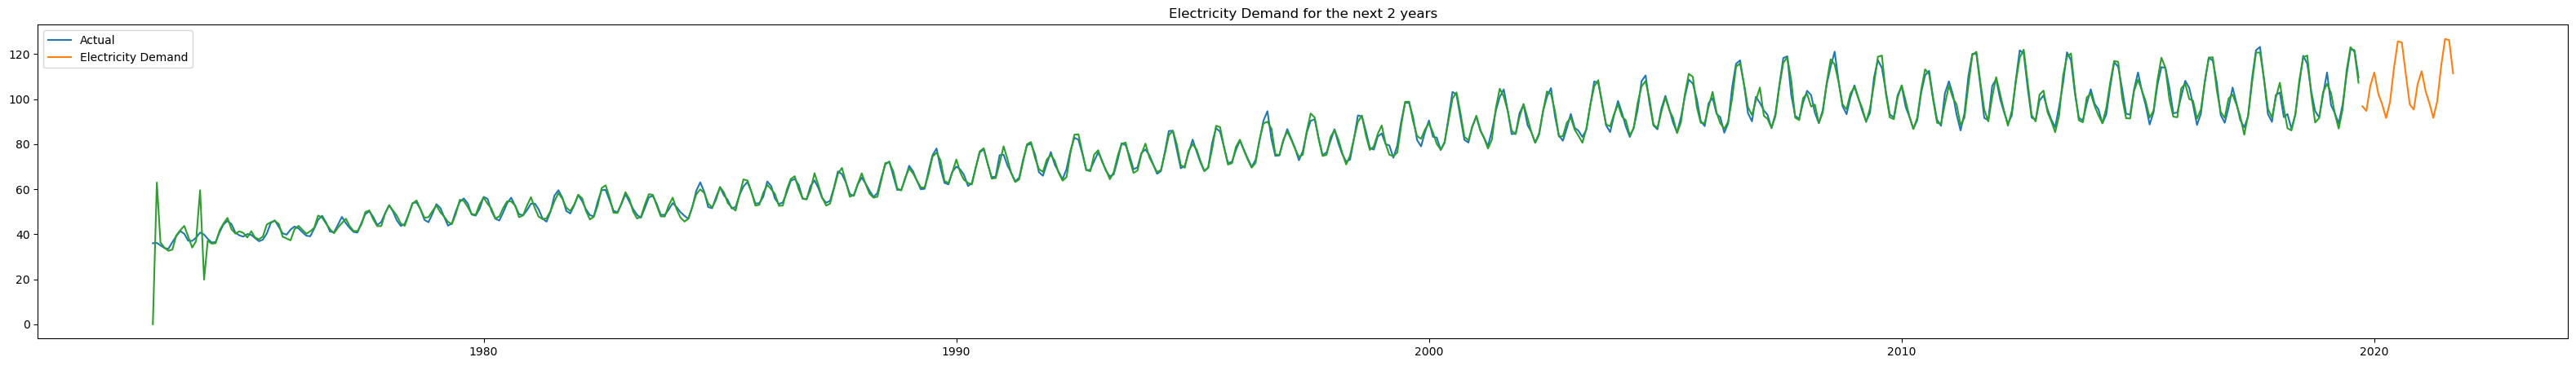

In [78]:
plt.figure(figsize=[40,5])
plt.title('Electricity Demand for the next 2 years')
plt.plot(df,label='Actual')
plt.plot(forecast,label='Electricity Demand')
plt.plot(model_fit.predict())
plt.legend()
plt.show()

## Conclusion :
☞ From 1973 to 2009, electricity use increased steadily. The price of power did not rise steadily after 2009.

☞ Every year, the months of June to August see the highest consumption. This indicates that seasonality is present. Due to the time needed for agriculture as well as for starting educational institutions, etc.

☞ Our example giving poor outcomes if the ARIMA model is used. We are thinking that our model's poor performance on the electricity consumption is due to seasonality.

☞ The Sarima model is operating successfully after a very large number of iterations.

☞ We are determining the ideal arima orders, seasonal order, and metrics from the countless iterations of the sarima model.

☞ ARIMA Order (p,d,q)         : (1,2,1)

☞ Seasonal Order(P,D,Q,T)         : (3,2,4,12)

☞ AIC(Akaike's Information Criterion) Score       : 2280.2174837466805

☞ Root Mean Square Error         : 2.773688351306687

☞ Root Mean Square Percentage Error     : 0.1415053123434872

☞ Mean Absolute Percentage Error    : 0.02185084067711337